# Model Prediction Improvement

# 1. Introduction

There are several methods that can help improve the prediction performance of models. Here are some commonly used techniques:
   
1. **Data Augmentation**: This refers to techniques that increase the amount of data by adding slightly modified copies of already existing data. For example, in image processing, these techniques could include rotation, scaling, flipping, etc. In text data, it can include methods like back translation or synonym replacement.


2. **Data Cleaning**: This involves taking care of missing values (by either filling them in based on existing data, or removing the data points entirely), and handling outliers (which might distort the training of the model).


3. **Feature engineering**: This is the process of creating new features from existing data that can help improve model performance. This can involve transformations of existing features, creating interaction features, or any other kind of data manipulation that creates new, useful input for the model.


4. **Model Selection**: This involves choosing the right machine learning algorithm for your specific problem. This could be a linear regression model, a decision tree, a neural network, etc. The choice depends on the nature of your data and the problem you're trying to solve.


5. **Hyperparameter tuning**: Hyperparameters are parameters that are not learned from the data but are set before the training process. Examples are learning rate, number of layers in a neural network, number of clusters in a K-means clustering, etc. Tuning these can often significantly improve performance. Techniques for hyperparameter tuning include grid search, random search, and more advanced methods like Bayesian optimization.


6. **Cross-validation**: This is a resampling procedure used to evaluate the performance of a model on a limited data sample. The dataset is partitioned into 'k' equally sized folds, and the model is trained on 'k-1' folds, and the remaining fold is used for testing. This process is repeated 'k' times so that we obtain a model performance score for each fold. It helps in assessing how the results of a statistical analysis will generalize to an independent data set.


7. **Regularization**: This is a technique used to prevent overfitting, which is when a model performs well on the training data but poorly on unseen data. Regularization works by adding a penalty term to the loss function that increases as the complexity of the model increases.


8. **Ensemble your model**: This refers to combining different models to improve overall performance. Techniques include Bagging (e.g., Random Forest), Boosting (e.g., Gradient Boosting, XGBoost), and Stacking.


Since we have already covered data cleaning, feature engineering in the previous sections, our attention in this section will shift to other topics, including data augmentation, model selection, ensemble model, regularization, cross-validation and hyperparameter tuning.

# 2. Dataset Exploration

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [46]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Create a dataframe
# "digits.data" contains the features and "digits.target" contains the target
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                  columns= digits['feature_names'] + ['target'])

# Separate the features (X) and the target (y)
X = df[digits['feature_names']]
y = df['target']

# Display the dataframe
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

As we can see, The dataset does **NOT** contain any NaN values.

In [48]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


# 3. Data Augmentation

The `augment_data` function is defined to perform data augmentation. It takes the original images and labels as input and generates augmented versions of each image. The augmentation includes adding the original image, its horizontal flip, and a 90-degree rotation. The augmented images and labels are stored in `augmented_images` and `augmented_labels`, respectively.

In [49]:
# Load the digit dataset
digits = load_digits()
images = digits.images
labels = digits.target

# Data augmentation (optional)
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        augmented_images.append(image)
        augmented_labels.append(label)

        augmented_images.append(np.fliplr(image))
        augmented_labels.append(label)

        augmented_images.append(np.rot90(image, k=1))
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

augmented_images, augmented_labels = augment_data(images, labels)


This code combines the original images and their augmented versions into a single dataset, resulting in `all_images` and `all_labels`.

In [50]:
# Combine original and augmented data
all_images = np.concatenate([images, augmented_images])
all_labels = np.concatenate([labels, augmented_labels])

The `plot_images` function is defined to visualize the original images and their augmented counterparts. It uses Matplotlib to create a grid of images, with the number of rows and columns specified by `rows` and `cols`. The function displays `num_samples` samples of original and augmented images side by side for better understanding.

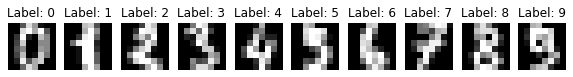

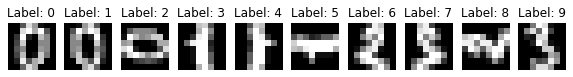

In [51]:
# Visualize the original images and their augmented counterparts
def plot_images(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

num_samples = 10# Number of samples to visualize for each category
original_images_sample = images[:num_samples]
augmented_images_sample = augmented_images[:num_samples]

plot_images(original_images_sample, labels[:num_samples], 1, num_samples)
plot_images(augmented_images_sample, labels[:num_samples], 1, num_samples)

# 4. Data Pre-processing

The digits dataset from sklearn is a clean dataset, meaning it `doesn't have missing values`, it `doesn't contain categorical features` that need to be encoded, and it `doesn't have obvious outliers`. Therefore, some pre-processing steps like handling missing values, encoding categorical variables, or outlier treatment are not applicable in this case.

# 5. Feature Engineering

The digits dataset is a set of 8x8 pixel images, and each pixel in the image is a feature. There are a total of 64 features for each image. These features are already in a form that's suitable for machine learning models, so it's typically not necessary to do additional feature engineering.

# 6. Hyperparameter Tuning using GridSearchCV with Visualization

## 6.1 Split the data into training and test sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

## 6.2 Hyperparameter Tuning using GridSearchCV with Visualization

This section performs model selection and hyperparameter tuning using GridSearchCV. We define `param_grid`, a dictionary with hyperparameters and their possible values. The `GridSearchCV` will perform a grid search over the parameter grid and use 5-fold cross-validation (`cv=5`) to find the best combination of hyperparameters for the Random Forest Classifier. After fitting the grid search, the best model is stored in `grid_search.best_estimator_`.

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train.reshape(len(X_train), -1), y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

## 6.3 Visualize Hyperparameter Tuning Results

This part is new and focuses on the visualization of hyperparameter tuning results. We extract the mean cross-validation scores (`mean_scores`) and the corresponding hyperparameter combinations (`param_combinations`) from the `grid_search.cv_results_ dictionary`. The `for` loop then prints each mean CV score along with its corresponding hyperparameter combination for reference.

After printing, we create a scatter plot to visualize the mean CV scores with respect to the hyperparameter combinations. The x-axis represents the values of `n_estimators`, the y-axis represents the values of `max_depth`, and the color of each point corresponds to the mean CV score. This plot helps us understand how different hyperparameter settings affect the model's performance during hyperparameter tuning.

Mean CV Score: 0.9774, Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Mean CV Score: 0.9798, Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Mean CV Score: 0.9816, Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Mean CV Score: 0.9730, Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Mean CV Score: 0.9739, Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Mean CV Score: 0.9765, Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Mean CV Score: 0.9760, Hyperparameters: {'max_depth': 20, 'n_estimators': 50}
Mean CV Score: 0.9800, Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Mean CV Score: 0.9816, Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


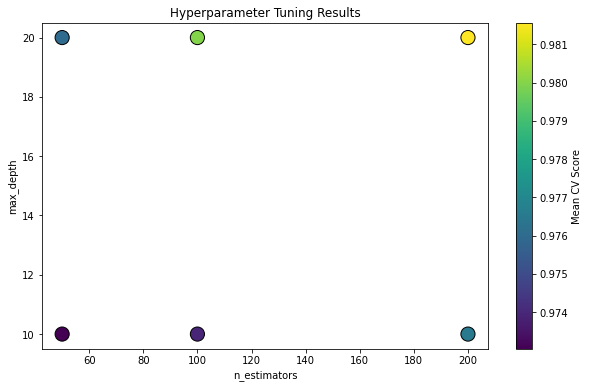

In [55]:
# Visualize Hyperparameter Tuning Results
mean_scores = grid_search.cv_results_['mean_test_score']
param_combinations = list(grid_search.cv_results_['params'])

for mean_score, params in zip(mean_scores, param_combinations):
    print(f"Mean CV Score: {mean_score:.4f}, Hyperparameters: {params}")

# Plotting the Mean Cross-Validation Scores
n_estimators_values = [param['n_estimators'] for param in param_combinations]
max_depth_values = [param['max_depth'] for param in param_combinations]

plt.figure(figsize=(10, 6))
plt.scatter(n_estimators_values, max_depth_values, c=mean_scores, cmap='viridis', s=200, edgecolors='k')
plt.colorbar(label='Mean CV Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

## 6.4 Best Model from Hyperparameter Tuning

In [56]:
# Best Model from Hyperparameter Tuning
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(n_estimators=200)

# 7. Regularization

We select the best model found during hyperparameter tuning and store it in `best_model`. Additionally, we create a regularized Random Forest Classifier (`regularized_model`) with a specific `max_depth` hyperparameter to prevent overfitting.

In [57]:
regularized_model = RandomForestClassifier(max_depth=10)
regularized_model.fit(X_train.reshape(len(X_train), -1), y_train)

RandomForestClassifier(max_depth=10)

# 8. Ensemble Techniques (Bagging and Voting)

In this section, we define two ensemble models: the Bagging Classifier (`bagging_model`) using regularized_model as the base estimator, and the Voting Classifier (`voting_model`) that combines the `regularized_model` and the `bagging_model`.

In [58]:
# Ensemble Techniques (Bagging and Voting)
bagging_model = BaggingClassifier(base_estimator=regularized_model, n_estimators=10, random_state=42)
voting_model = VotingClassifier([('rf', regularized_model), ('bagging', bagging_model)])


# 9. Train the Bagging and Voting models on the entire training data

Both the Bagging and Voting models are trained on the entire training data.



In [59]:
# Train the Bagging and Voting models on the entire training data
bagging_model.fit(X_train.reshape(len(X_train), -1), y_train)
voting_model.fit(X_train.reshape(len(X_train), -1), y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=10)),
                             ('bagging',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10),
                                                random_state=42))])

# 10. Evaluate the Bagging and Voting models on the test set

The Bagging and Voting models are evaluated on the test set, and their performance is measured using accuracy scores.

In [60]:
y_pred_bagging = bagging_model.predict(X_test.reshape(len(X_test), -1))
y_pred_voting = voting_model.predict(X_test.reshape(len(X_test), -1))

test_accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
test_accuracy_voting = accuracy_score(y_test, y_pred_voting)

# 11. Print results

In [62]:
# Print results
print("Best Model Parameters:", grid_search.best_params_)
print("Test Accuracy (Best Model):", best_model.score(X_test.reshape(len(X_test), -1), y_test))
print("Test Accuracy (Bagging Model):", test_accuracy_bagging)
print("Test Accuracy (Voting Model):", test_accuracy_voting)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Best Model Parameters: {'max_depth': None, 'n_estimators': 200}
Test Accuracy (Best Model): 0.9819193324061196
Test Accuracy (Bagging Model): 0.9756606397774688
Test Accuracy (Voting Model): 0.9749652294853964
